In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time

In [48]:
def does_percolate_obc(loss_inds):
    G = nx.Graph() # loss graph
    G.add_nodes_from(np.arange(r1*r2*r3))
    
    for loss_index in loss_inds:
        x1 = (int(loss_index/3)%(r1*r2))%r1
        y1 = int((int(loss_index/3)%(r1*r2))/r1)
        z1 = int(int(loss_index/3)/(r1*r2))
        
        if loss_index%3 ==0 and x1<r1-1:
            x2 = (x1 +1 )
            y2 = y1
            z2 = z1
            q2 = (z2*r2+y2)*r1 + x2
            G.add_edge(int(loss_index/3),q2)
        elif loss_index%3 == 1 and y1<r2-1:
            x2 = x1
            y2 = (y1+1)
            z2 = z1            
            q2 = (z2*r2+y2)*r1 + x2
            G.add_edge(int(loss_index/3),q2)
        elif loss_index%3 == 2 and z1<r3-1:
            x2 = x1
            y2 = y1
            z2 = (z1+1)
            q2 = (z2*r2+y2)*r1 + x2
            G.add_edge(int(loss_index/3),q2)
#     nx.draw(G, with_labels=True, font_weight='bold')

#     print(list(G.edges))
    path_z = 0
    for i_first in z0:
        for i_last in zlast:
            if nx.has_path(G,i_first,i_last):
                path_z = 1
                break

    path_x = 0
    for i_first in x0:
        for i_last in xlast:
            if nx.has_path(G,i_first,i_last):
                path_x = 1
                break
                
    path_y = 0
    for i_first in y0:
        for i_last in ylast:
            if nx.has_path(G,i_first,i_last):
                path_y = 1
                break

    return path_x, path_y, path_z    

In [ ]:
Np = 10
p_list = np.linspace(0.0,0.3,Np) # loss probability
L_list = np.arange(4,11)
prob = np.zeros((len(L_list),Np))

Nrep = 400
for i_L, L in enumerate(L_list):
    print(L)
    tic = time.time()
    r1, r2, r3 = L, L, L
    z0 = np.arange(r1*r2)
    zlast = np.arange((r3-1)*(r1*r2),r3*r2*r1)

    x0 = np.zeros(r2*r3)
    xlast = np.zeros(r2*r3)
    for i1 in range(r2):
        x0[r3*i1:r3*(i1+1)] = np.arange(i1*r1,r1*r2*r3,r1*r2)
        xlast[r3*i1:r3*(i1+1)] = r1-1 + np.arange(i1*r1,r1*r2*r3,r1*r2)

    y0 = np.zeros(r1*r3)
    ylast = np.zeros(r1*r3)
    for i1 in range(r3):
        y0[r1*i1:r1*(i1+1)] = i1*r1*r2+ np.arange(0,r1) 
        ylast[r1*i1:r1*(i1+1)] = i1*r1*r2+ (r2-1)*r1+ np.arange(0,r1)

    for i_r in range(Nrep):
        for i_p, prob_l in enumerate(p_list):
            # loss error
            error_loss = np.random.rand(3*r1*r2*r3) 
            loss_inds = np.argwhere(error_loss < prob_l)[:,0]

            sx, sy, sz = does_percolate_obc(loss_inds)
            prob[i_L,i_p] += (sx+sy+sz)>0
            
            
    toc = time.time()
    print("time = ", toc-tic, "secs")
prob /= Nrep



4
time =  48.064351320266724 secs
5
time =  120.22018718719482 secs
6
time =  253.3526906967163 secs
7
time =  483.2915530204773 secs
8
time =  978.7725493907928 secs
9
time =  1780.4958386421204 secs
10


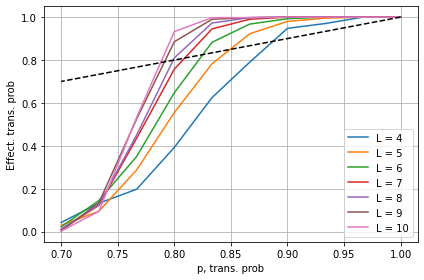

In [79]:
plt.figure()
for i_L, L in enumerate(L_list):
    plt.plot(1-p_list,(1-prob[i_L,:]),"-", color = "C%d" % i_L, label="L = %d" % L)
    # plt.plot(1-p_list,(1-prob[i_L,:])**2,"--", color = "C%d" % i_L, label="L = %d" % L)

plt.plot(1-p_list,1-p_list,"k--")
plt.xlabel("p, trans. prob")
plt.ylabel("Effect. trans. prob")
plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig("trans-toric-code.pdf")
plt.show()


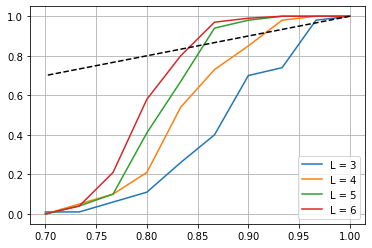

In [57]:
plt.figure()
for i_L, L in enumerate(L_list):
    plt.plot(1-p_list,(1-prob[i_L,:]),"-", color = "C%d" % i_L, label="L = %d" % L)

plt.plot(1-p_list,1-p_list,"k--")
plt.legend()
plt.grid()
plt.show()

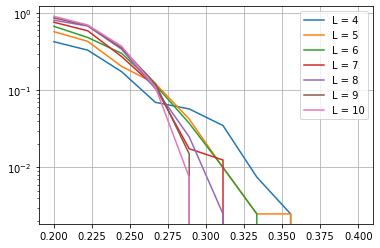

In [69]:
plt.figure()
for i_L, L in enumerate(L_list):
    plt.plot(p_list,1-prob[i_L,:],"-", color = "C%d" % i_L, label="L = %d" % L)

plt.legend()
# plt.ylim(4e-1,1.02)
plt.yscale("log")
plt.grid()
plt.show()